In [29]:
import torch
from sklearn.decomposition import PCA
from miditok import REMI
import matplotlib.pyplot as plt
import numpy as np


def pca(path):
    word_embedding = torch.load(path, map_location=torch.device('cpu'))['word_embedding.weight']
    tokenizer = REMI(sos_eos_tokens=False, mask=False)
    three_dim = PCA(random_state=0).fit_transform(word_embedding.detach().numpy())[:, :3]
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    colors = ['Dark2', 'Oranges', 'Greens', 'Blues', 'Purples', 'Reds']
    for (key, value), color in zip(tokenizer.vocab._token_types_indexes.items(), colors):
        # Data for a three-dimensional line
        print(key, color)
        ax.scatter(
            three_dim[value[0]: value[-1] + 1, 0], three_dim[value[0]: value[-1] + 1, 1], three_dim[value[0]: value[-1] + 1, 2], c=three_dim[value[0]: value[-1] + 1, 2],
             cmap=color
        )
    plt.show()


PAD Dark2
Bar Oranges
Pitch Greens
Velocity Blues
Duration Purples
Position Reds


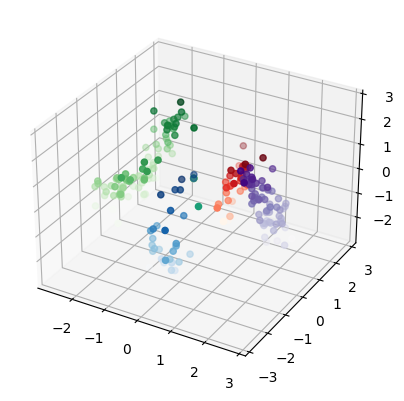

In [30]:
pca('./diffusion_models/diff_midi_giant_midi_piano_REMI_bar_block_rand32_transformer_lr0.0001_0.0_2000_sqrt_Lsimple_h128_s2_d0.1_sd102_xstart_midi/model400000.pt')
